In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import numpy as np
import pandas as pd

In [4]:
y_true = np.array([0, 1, 1, 0, 0, 0, 0, 0])
y_pred = np.array([0, 1, 0, 1, 0, 0, 1, 1])

tp = ((y_true == 1) & (y_pred == 1)).sum()
tn = ((y_true == 0) & (y_pred == 0)).sum()
fp = ((y_true == 0) & (y_pred == 1)).sum()
fn = ((y_true == 1) & (y_pred == 0)).sum()
tp

1

In [5]:
def accuracy(y_true, y_pred):
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return (tp+tn)/len(y_true)

In [6]:
y_true1 = np.array([0, 1, 1, 0, 0, 0, 0, 0])
y_pred1 = np.array([0, 1, 0, 1, 0, 0, 1, 1])

In [7]:
accurac1 = accuracy(y_true1, y_pred1)
accurac1

0.5

In [8]:
def accuracy2(y_true, y_pred):
    tpn = (y_true == y_pred).sum()
    all_n = len(y_true)
    return tpn/all_n

In [9]:
accurac2 = accuracy2(y_true1, y_pred1)
accurac2

0.5

-------------------

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
columns = [f"feature_{i}" for i in range(1, 58)] + ["is_spam"]
data = pd.read_csv(url, names=columns)

In [12]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [18]:
len(data)

4601

In [22]:
X = data.drop('is_spam', axis=1)
X.columns
y = data['is_spam']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = LogisticRegression(max_iter=400, penalty=None)
model.fit(X_train_scaled, y_train)

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

In [48]:
y_pred = model.predict(X_test_scaled)

In [49]:
accuracy = accuracy_score(y_test, y_pred)

In [50]:
accuracy

0.9131378935939196

In [51]:
model.classes_

array([0, 1], dtype=int64)

In [42]:
model.coef_[0][0]

-0.08966928923774072

In [43]:
model.intercept_

array([-22.84455942])

In [44]:
model.n_iter_

array([450])

In [45]:
model.tol

0.0001

In [46]:
model.solver

'lbfgs'

In [52]:
from sklearn.datasets import load_breast_cancer

In [59]:
data = load_breast_cancer()
X, y = data.data, data.target

In [60]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
np.sum(np.isnan(X))

0

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [70]:
model_base = LogisticRegression(penalty=None)
model_base.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

In [71]:
y_pred_base = model_base.predict(X_test_scaled)

In [72]:
accuracy_score(y_test, y_pred_base)

0.9385964912280702

In [73]:
model_base.coef_

array([[  18.67443273,  -38.77042061,   85.86399926,   21.8257228 ,
           9.94570073,  599.62574665, -292.31615423, -579.85045482,
          88.15339417, -367.90409663, -566.49052441,   78.56768921,
         253.55310196, -364.74899575, -170.57609367, -213.95019909,
         537.73121534, -153.72217854,  208.77254509,  286.78506526,
        -231.75346764, -197.86154662,  159.55047729, -227.01410725,
         203.4098774 ,   63.44419564, -531.47590122,  -19.53772394,
        -367.00572403,  130.08103858]])

In [74]:
np.max(np.abs(model_base.coef_[0]))

599.6257466519647

In [80]:
model_base = LogisticRegression(penalty='l2')
model_base.fit(X_train_scaled, y_train)

y_pred_base = model_base.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_base))

y_pred_base_train = model_base.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred_base_train))

np.max(np.abs(model_base.coef_[0]))

0.9736842105263158
0.9868131868131869


1.3421882977984962

In [83]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train_scaled, y_train)

y_pred_l1 = model_l1.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_l1))

y_pred_l1_train = model_l1.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred_l1_train))

np.max(np.abs(model_base.coef_[0]))

0.9736842105263158
0.989010989010989


1.3421882977984962

-----------------

In [84]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [88]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Zmienna 1')
    plt.ylabel('Zmienna 2')
    plt.title('Granica decyzyjna modelu regresji logistycznej')
    plt.show()

In [89]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=43) 

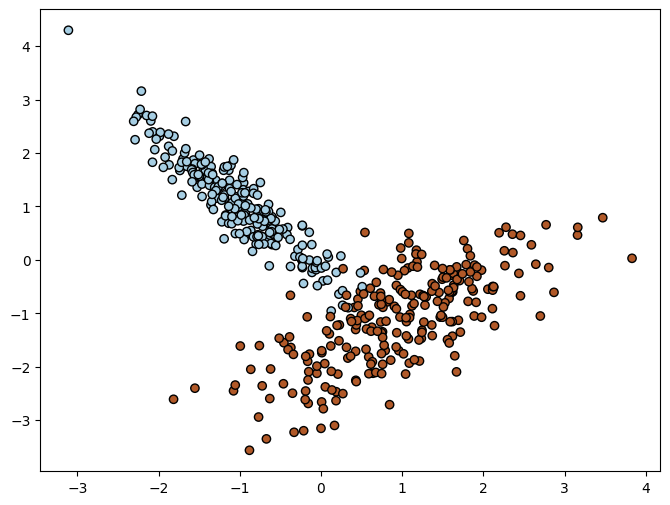

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

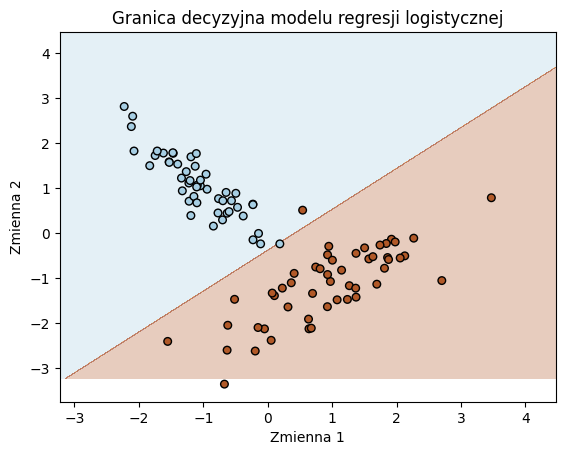

In [101]:
plot_decision_boundary(model, X_test, y_test)

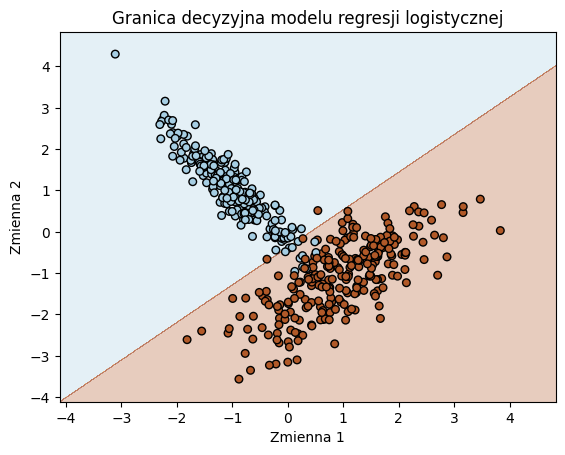

In [102]:
plot_decision_boundary(model, X, y)